# ARIMA Model for Time Series Forecasting

ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA Models are specified by three order parameters: (p, d, q)
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

In [1]:
import numpy as np 
import pandas as pd

I am considering Drug sales dataset which is as follows

In [2]:
path='C:/Users/nitya/Downloads/Time series/dataset.txt'
data=pd.read_csv(path)
data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


# Finding the order of differencing (d) in ARIMA model 

The purpose of differencing is to make the time series stationary.So we should determine the right order of differencing

First, let's check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. 

The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

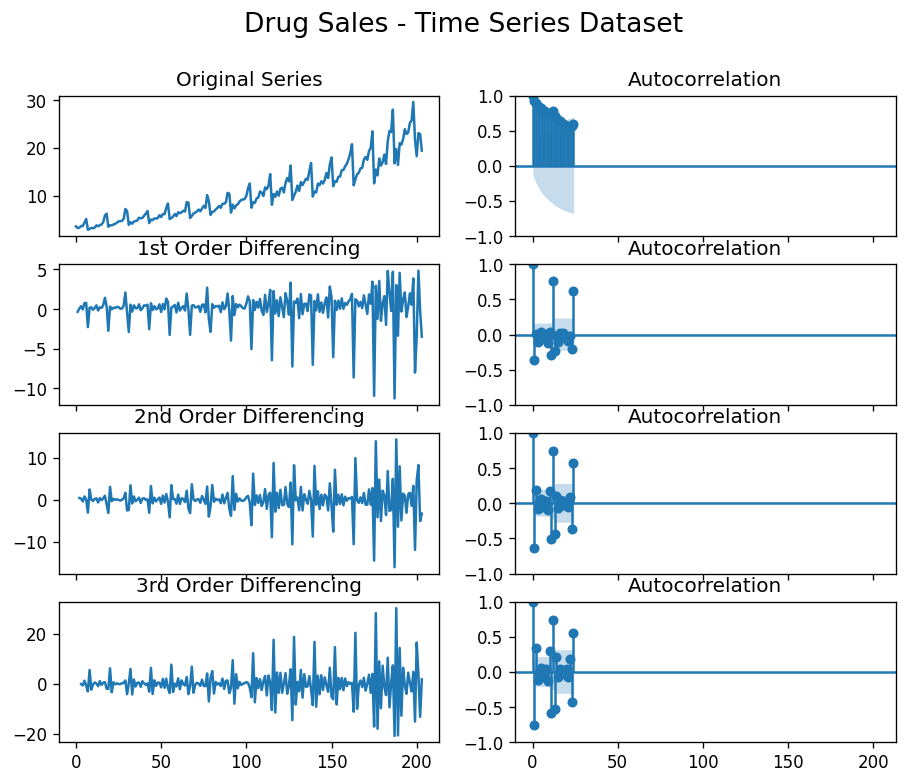

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, fig_plot = plt.subplots(4, 2, sharex=True)
fig_plot[0, 0].plot(data.value) 
fig_plot[0, 0].set_title('Original Series')
plot_acf(data.value, ax=fig_plot[0, 1])

# 1st Differencing
fig_plot[1, 0].plot(data.value.diff())
fig_plot[1, 0].set_title('1st Order Differencing')
plot_acf(data.value.diff().dropna(), ax=fig_plot[1, 1])

# 2nd Differencing
fig_plot[2, 0].plot(data.value.diff().diff())
fig_plot[2, 0].set_title('2nd Order Differencing')
plot_acf(data.value.diff().diff().dropna(), ax=fig_plot[2, 1])

# 3rd Differencing
fig_plot[3, 0].plot(data.value.diff().diff().diff())
fig_plot[3, 0].set_title('3rd Order Differencing')
plot_acf(data.value.diff().diff().diff().dropna(), ax=fig_plot[3, 1])

plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)

plt.show()

For the above data, we can see that the time series reaches stationarity with two orders of differencing.

# Finding the order of the AR term (p)

We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

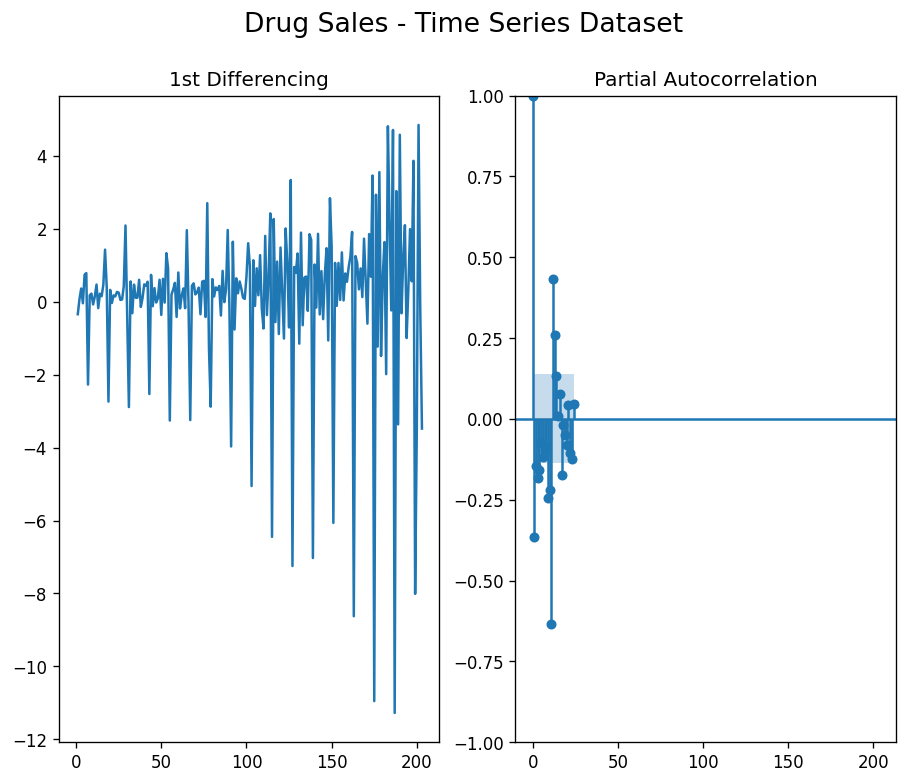

In [5]:
# PACF plot of 1st differenced series

fig, fig_plot = plt.subplots(1, 2, sharex=True)
fig_plot[0].plot(data.value.diff())
fig_plot[0].set_title('1st Differencing')
fig_plot[1]
plot_pacf(data.value.diff().dropna(), ax=fig_plot[1])
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)

plt.show()

We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

# Finding the order of the MA term (q)

Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

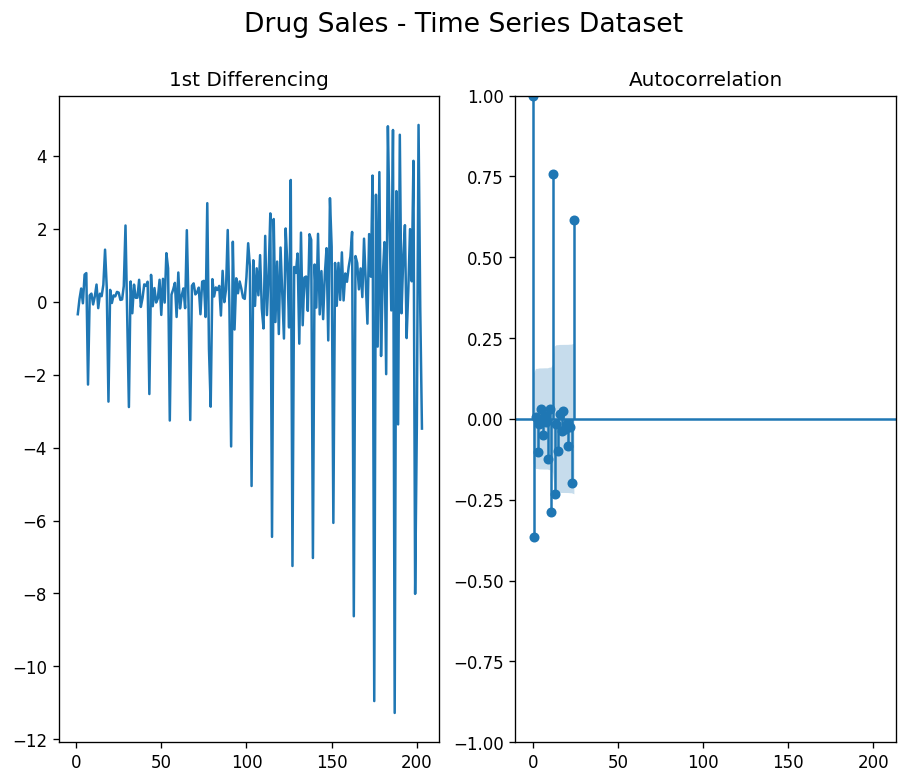

In [6]:
fig, fig_plot = plt.subplots(1, 2, sharex=True)
fig_plot[0].plot(data.value.diff())
fig_plot[0].set_title('1st Differencing')
fig_plot[1]
plot_acf(data.value.diff().dropna(), ax=fig_plot[1])
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)

plt.show()

We can see that couple of lags are well above the significance line. So, we will fix q as 2. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

# Building an ARIMA model

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Fri, 07 Jul 2023   AIC                            857.140
Time:                        17:57:08   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, we will rebuild the model without the MA2 term.

In [8]:
# 1,1,1 ARIMA Model
model = ARIMA(data.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Fri, 07 Jul 2023   AIC                            855.524
Time:                        17:57:10   BIC                            865.463
Sample:                             0   HQIC                           859.545
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2         3.8327      0.259     14.790      0.0

The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

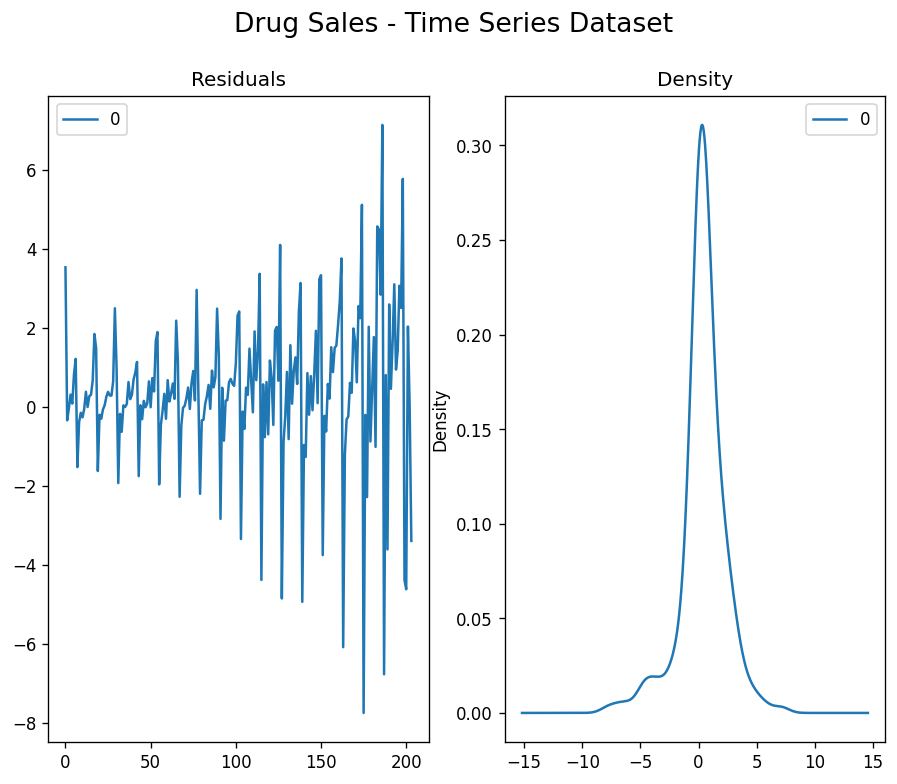

In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

Text(0.5, 0.98, 'Drug Sales - Time Series Dataset')

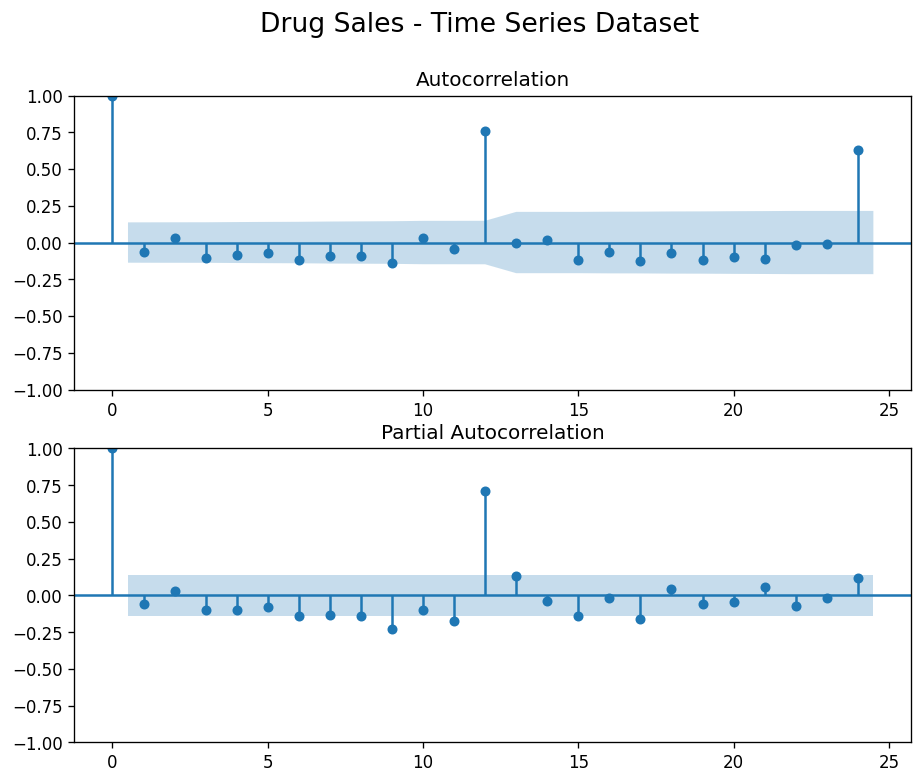

In [10]:
fig, ax = plt.subplots(2,1)
acf_res=plot_acf(residuals,ax=ax[0])
pacf_res=plot_pacf(residuals,ax=ax[1])
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)

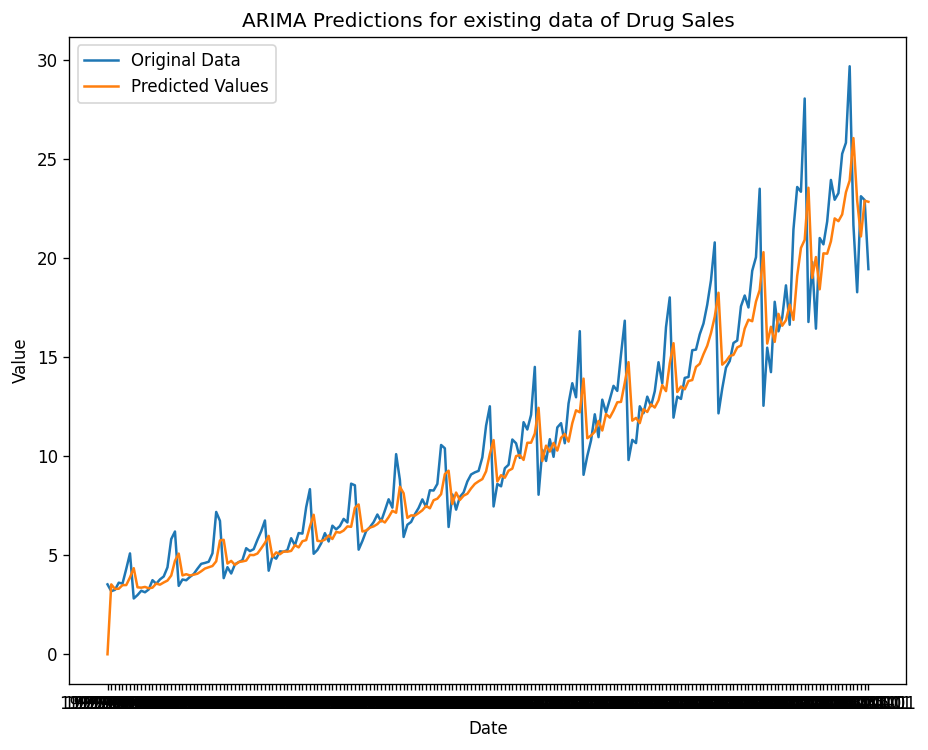

In [11]:
#model = ARIMA(data.value, order=(1,1,1))
#model_fit = model.fit()


# Step 2: Generate predictions for existing dates in 'data['date']'
start_index = data['date'].index[0]
end_index = data['date'].index[-1]
predictions = model_fit.predict(start=start_index, end=end_index)

# Step 3: Plot the original data and the predicted values
plt.plot(data['date'], data['value'], label='Original Data')
plt.plot(data['date'], predictions, label='Predicted Values')

# Add labels, title, and legend to the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions for existing data of Drug Sales')
plt.legend()

# Display the plot
plt.show()


In [12]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.value[:85]
test = data.value[85:]

C:\Users\nitya\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


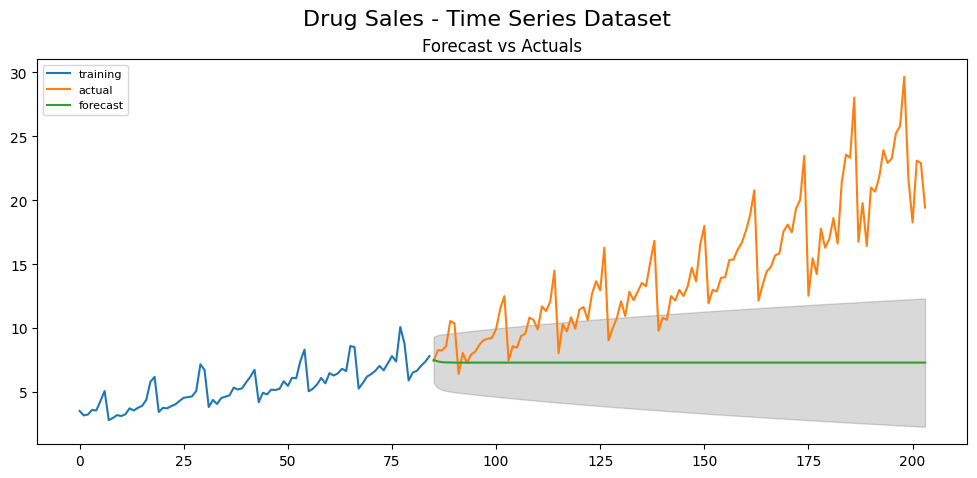

In [13]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

#forecast
forecast = fitted.get_forecast(steps=119, alpha=0.05)
fc = forecast.predicted_mean
conf = forecast.conf_int()

# Accessing the standard errors (se)
se = forecast.se_mean

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=test.index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()


From the above chart, the ARIMA(1,1,1) model seems to predict a correct forecast. The actual observed values lie within the 95% confidence band.

But, we can see that the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve.

So, in this case, we should increase the order of differencing to two (d=2) and iteratively increase p and q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.886
Date:                Fri, 07 Jul 2023   AIC                            243.771
Time:                        17:57:21   BIC                            255.865
Sample:                             0   HQIC                           248.630
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2205      0.194     -1.139      0.255      -0.600       0.159
ar.L2         -0.3436      0.141     -2.444      0.015      -0.619      -0.068
ar.L3         -0.0936      0.252     -0.371      0.7

C:\Users\nitya\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


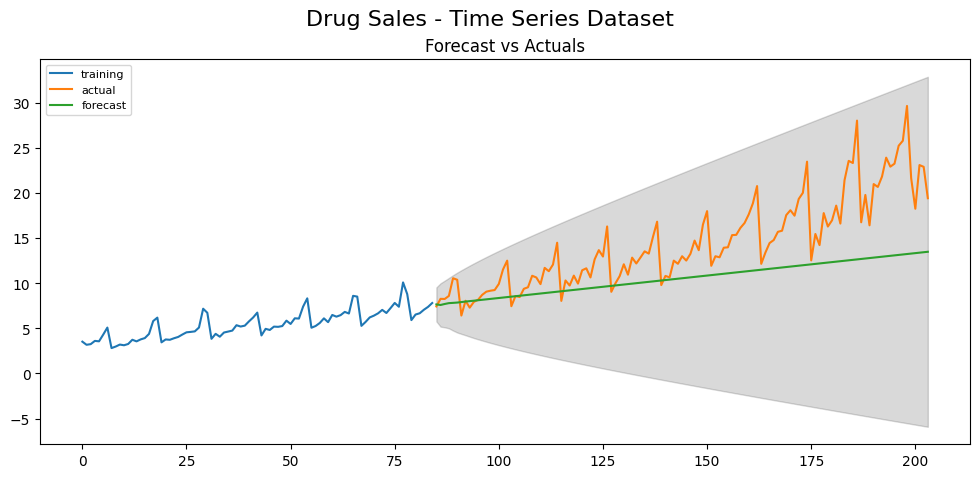

In [14]:
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()
print(fitted.summary())

#forecast
forecast = fitted.get_forecast(steps=119, alpha=0.05)
fc = forecast.predicted_mean
conf = forecast.conf_int()

# Accessing the standard errors (se)
se = forecast.se_mean

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=test.index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

The AIC has reduced to 245 from 843 which is good. Mostly, the p-values of the X terms are less than < 0.05, which is great. So overall this model is much better.

# Accuracy Metrics for Time Series Forecast 

The commonly used accuracy metrics to judge forecasts are:
Mean Absolute Percentage Error (MAPE), Mean Error (ME), Mean Absolute Error (MAE), Mean Percentage Error (MPE), Root Mean Squared Error (RMSE), Lag 1 Autocorrelation of Error (ACF1), Correlation between the Actual and the Forecast (corr), Min-Max Error (minmax).

Typically, we will use three accuracy metrices:-

MAPE, Correlation and Min-Max Error can be used.
The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.

In [15]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) #MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


forecast_accuracy(fc, test.values)

C:\Users\nitya\AppData\Local\Temp\ipykernel_63228\1709539997.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\nitya\AppData\Local\Temp\ipykernel_63228\1709539997.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.2326650539806974,
 'me': -3.8806540229448965,
 'mae': 3.9816926829715147,
 'mpe': -0.219303885366068,
 'rmse': 5.307159155702498,
 'acf1': 0.696029314966463,
 'corr': 0.873688462270408,
 'minmax': 0.23186602514776544}

Around 23.22% MAPE implies the model is about 76.78% accurate in predicting the next 15 observations.

# Auto Arima Forecasting in Python 


In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

We need to install the pmdarima package first.

In [16]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(data.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=0.35 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=860.865, Time=0.50 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit 

# Interpreting the residual plots in ARIMA model

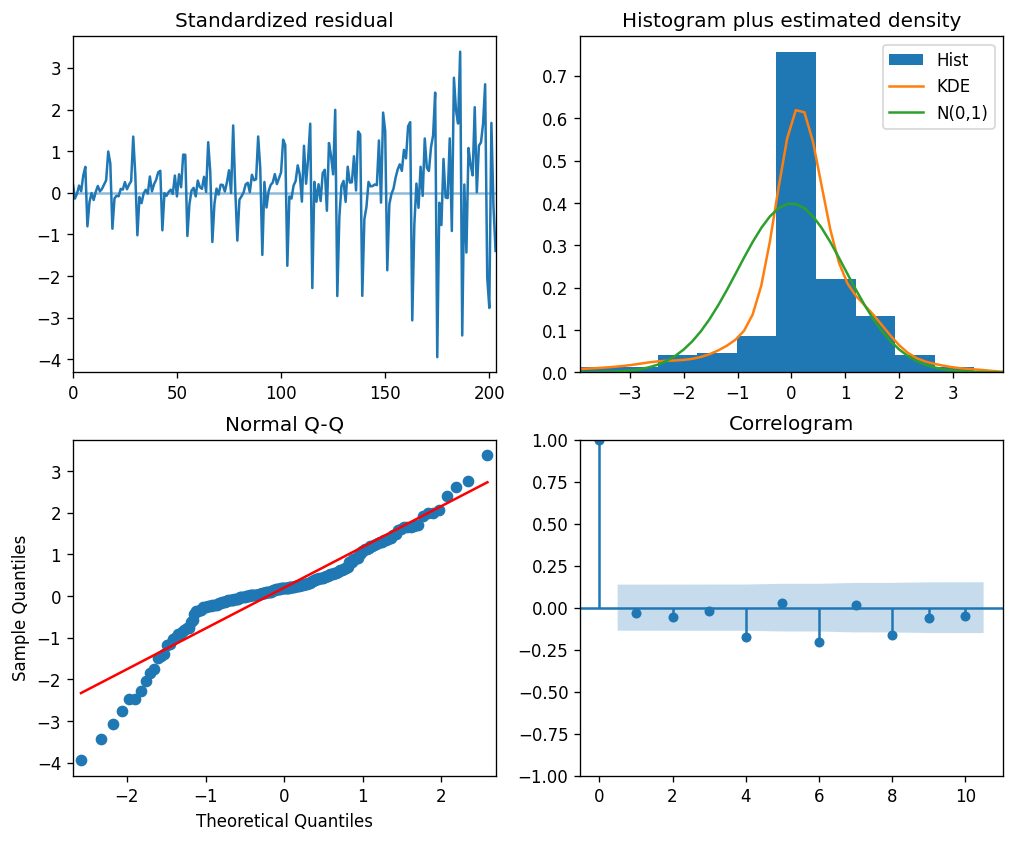

In [18]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

Interpretation of plots in plot diagnostics
Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit. So, let's use it to forecast.

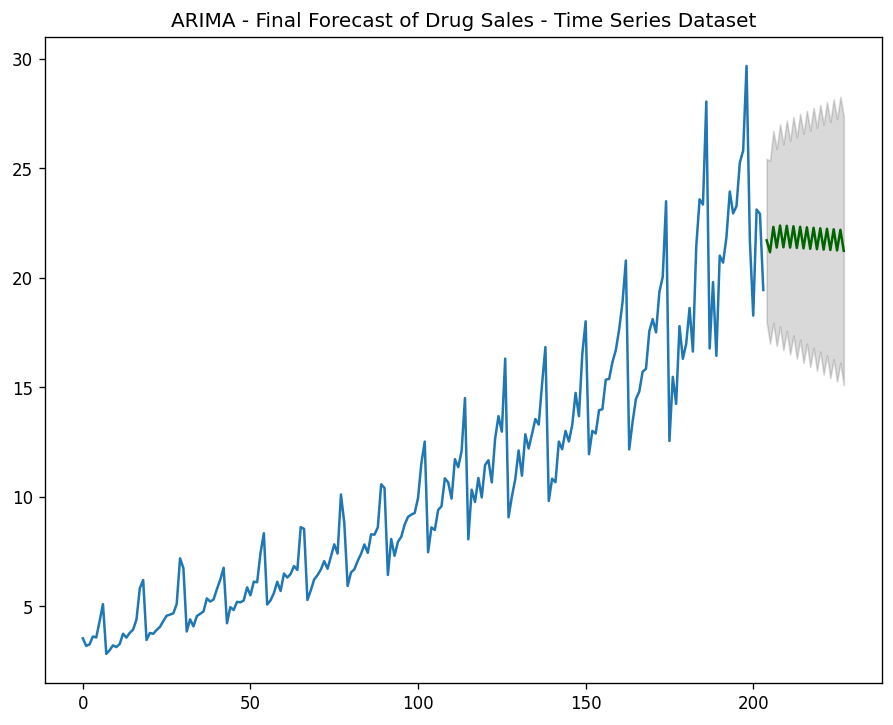

In [19]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.value), len(data.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

# SARIMA model  

The plain ARIMA model has a problem. It does not support seasonality.

If the time series has defined seasonality, then we should go for Seasonal ARIMA model (in short SARIMA) which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.
Now, we will build a SARIMA model on the time series dataset.

But, first import the dataset

In [20]:
data = pd.read_csv('C:/Users/nitya/Downloads/Time series/dataset.txt', parse_dates=['date'], index_col='date')
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


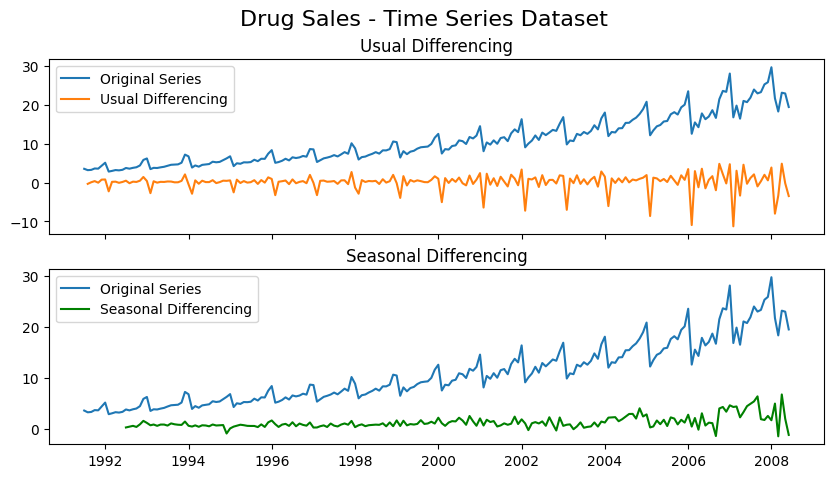

In [21]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

Now, let’s build the SARIMA model using pmdarima‘s auto_arima(). To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [22]:
# !pip3 install pyramid-arima (already done)
#import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.31 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=2.86 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.24 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.571, Time=3.70 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.32 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.53 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.25 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.054
Date:                            Fri, 07 Jul 2023   AIC                            524.109
Time:                                    17:59:46   BIC                            550.169
Sample:                                07-01-1991   HQIC                           534.663
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.009      0.542      0.588      -0.013       0.022
ar.L1          0.9766      0.018     53.302      0.000       0.941       1.012
ma.L1         -0.8974      0.056    -16.025      0.000      -1.007      -0.788
ma.L2          0.2041      0.057      3.556      0.000       0.092       0.317
ar.S.L12       0.8524      0.176      4.853      0.000       0.508       1.197
ma.S.L12      -1.5548      0.195     -7.985      0.000      -1.936      -1.173
ma.S.L24       0.7231      0.114      6.357      0.000       0.500       0.946
sigma2         0.7585      0.062     12.179      0.000       0.636       0.881
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):               143.41
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let’s forecast for the next 24 months.

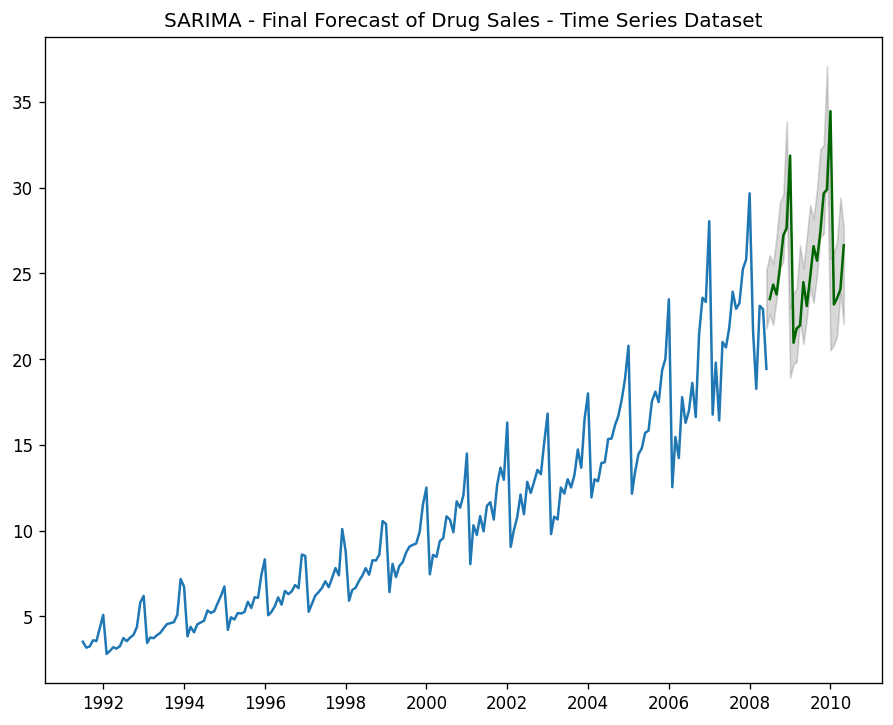

In [23]:
# Forecast
n_of_periods = 24
fitted, confint = smodel.predict(n_periods=n_of_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_of_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

# SARIMAX model with exogeneous variables

Now, I will force an external predictor, also called, exogenous variable into the model. This model is called the SARIMAX model. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

So, I always know what values the seasonal index will hold for the future forecasts.

Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [24]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')


seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

In [25]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.27 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=2.81 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.13 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.571, Time=3.91 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.44 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.66 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.25 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.054
Date:                            Fri, 07 Jul 2023   AIC                            524.109
Time:                                    18:01:24   BIC                            550.169
Sample:                                07-01-1991   HQIC                           534.663
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.009      0.542      0.588      -0.013       0.022
ar.L1          0.9766      0.018     53.302      0.000       0.941       1.012
ma.L1         -0.8974      0.056    -16.025      0.000      -1.007      -0.788
ma.L2          0.2041      0.057      3.556      0.000       0.092       0.317
ar.S.L12       0.8524      0.176      4.853      0.000       0.508       1.197
ma.S.L12      -1.5548      0.195     -7.985      0.000      -1.936      -1.173
ma.S.L24       0.7231      0.114      6.357      0.000       0.500       0.946
sigma2         0.7585      0.062     12.179      0.000       0.636       0.881
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):               143.41
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""